In [1]:
import pandas as pd
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_absolute_error, mean_squared_error
from sklearn.model_selection import train_test_split

# load coin_Bitcoin.xlsx
df = pd.read_excel('coin_Bitcoin.xlsx')
df.head()

,SNo,Name,Symbol,Date,High,Low,Open,Close,Volume,Marketcap
0,1,Bitcoin,BTC,2013-04-29 23:59:59,147.488007,134.000000,134.444000,144.539993,0.0,1.603769e+09
1,2,Bitcoin,BTC,2013-04-30 23:59:59,146.929993,134.050003,144.000000,139.000000,0.0,1.542813e+09
2,3,Bitcoin,BTC,2013-05-01 23:59:59,139.889999,107.720001,139.000000,116.989998,0.0,1.298955e+09
3,4,Bitcoin,BTC,2013-05-02 23:59:59,125.599998,92.281898,116.379997,105.209999,0.0,1.168517e+09
4,5,Bitcoin,BTC,2013-05-03 23:59:59,108.127998,79.099998,106.250000,97.750000,0.0,1.085995e+09


In [2]:
# 1- Create a target column by averaging the low + high.
df['target'] = (df['Low'] + df['High']) / 2

# Drop only open, close columns.
df = df.drop(['Open', 'Close','Name',  'Symbol'], axis=1)

# Convert the date column to datetime format
df["Date"] = pd.to_datetime(df["Date"])

# Convert the date to long format
df["Date"] = df["Date"].astype("int64")

# Print the preprocessed data
df.head()


,SNo,Date,High,Low,Volume,Marketcap,target
0,1,1367279999000000000,147.488007,134.000000,0.0,1.603769e+09,140.744003
1,2,1367366399000000000,146.929993,134.050003,0.0,1.542813e+09,140.489998
2,3,1367452799000000000,139.889999,107.720001,0.0,1.298955e+09,123.805000
3,4,1367539199000000000,125.599998,92.281898,0.0,1.168517e+09,108.940948
4,5,1367625599000000000,108.127998,79.099998,0.0,1.085995e+09,93.613998


In [3]:

# 4- Before applying machine learning divide the data into training and testing part with 70-30
# aspect ratio.
X = df.drop(['target'], axis=1)
y = df['target']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, shuffle=False)


# 3- Apply Linear Regression
model = LinearRegression()
model.fit(X_train, y_train)

# Make predictions on the test set
y_pred = model.predict(X_test)

# Calculate the error both mean absolute and mean squared error.
mae = mean_absolute_error(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)

print(f'Mean Absolute Error: {mae}')
print(f'Mean Squared Error: {mse}')


Mean Absolute Error: 5.6173809625477763e-05
Mean Squared Error: 1.0500700868096453e-08


C:\Users\ammar\AppData\Local\Temp\ipykernel_2148\984731517.py:8: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  plt.scatter(X['Date'], y, cmap='viridis', label='Actual Values')


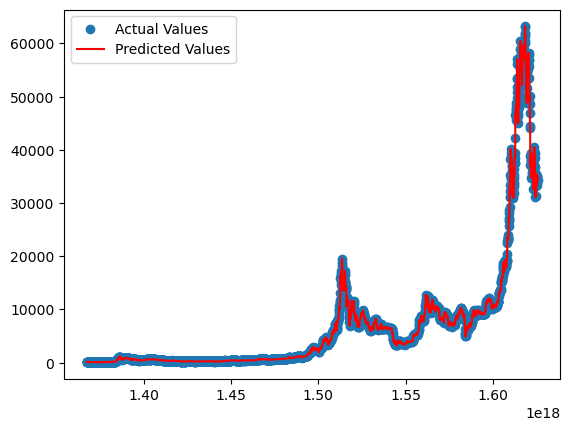

In [4]:
# 5- Draw the linear regression line estimated by Model.
import matplotlib.pyplot as plt

# Plot the actual target values and the predicted values
y_pred = model.predict(X)

# Plot the actual values and the predicted values on a scatter plot
plt.scatter(X['Date'], y, cmap='viridis', label='Actual Values')
plt.plot(X['Date'], y_pred, color='red', label='Predicted Values')
plt.legend()
plt.show()
